In [19]:
import os
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import pandas as pd 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier

In [2]:
input_dir =r"C:\Users\UT\Downloads\archive (13)\Dataset"
categories = ["Bus","Car","cats","dogs","motorcycle","Truck"]


In [3]:
data = []
labels =[]

In [4]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pandas as pd

Categories = ["Bus", "Car", "cats", "dogs", "motorcycle", "Truck"]
datadir = r"C:\Users\UT\Downloads\archive (13)\Dataset"
image_size = (64, 64, 3)  # Reduced size to 64x64

flat_data_arr = [] 
target_arr = []  

for category in Categories:
    print(f'Loading... category: {category}')
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        try:
            img_array = imread(img_path)
            img_resized = resize(img_array, image_size)
            flat_data_arr.append(img_resized.flatten())
            target_arr.append(Categories.index(category))
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    print(f'Loaded category: {category} successfully')

flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

# Creating a DataFrame
df = pd.DataFrame(flat_data)
df['Target'] = target

print(df.shape)
print(df.head())


Loading... category: Bus
Loaded category: Bus successfully
Loading... category: Car
Loaded category: Car successfully
Loading... category: cats
Loaded category: cats successfully
Loading... category: dogs
Loaded category: dogs successfully
Loading... category: motorcycle
Loaded category: motorcycle successfully
Loading... category: Truck


C:\Users\UT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Loaded category: Truck successfully
(744, 12289)
          0         1         2         3         4         5         6  \
0  0.956510  0.956510  0.964353  0.956115  0.956115  0.963958  0.958152   
1  0.705126  0.836903  0.939652  0.698041  0.834245  0.939738  0.706428   
2  0.258496  0.247051  0.214949  0.215697  0.211175  0.178382  0.205558   
3  0.041654  0.209283  0.388517  0.039878  0.209022  0.392703  0.048987   
4  0.601700  0.644399  0.701088  0.588916  0.656928  0.751195  0.588377   

          7         8         9  ...     12279     12280     12281     12282  \
0  0.958152  0.965995  0.960539  ...  0.774381  0.684488  0.596956  0.772320   
1  0.839121  0.942106  0.717667  ...  0.623110  0.622049  0.614092  0.617692   
2  0.205779  0.170673  0.482113  ...  0.522308  0.497689  0.453208  0.523874   
3  0.207928  0.392800  0.048880  ...  0.180882  0.133793  0.071107  0.186239   
4  0.656289  0.751961  0.588234  ...  0.366309  0.387011  0.349127  0.363749   

      12283     122

In [5]:
df=pd.DataFrame(flat_data)  
df['Target']=target 
df.shape

(20400, 12289)

In [5]:
x=df.iloc[:,:-1]  

y=df.iloc[:,-1]

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [7]:
d = DecisionTreeClassifier()

In [8]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [9]:
y_pred = d.predict(x_test)

In [10]:
accuracy_score(y_test,y_pred)

0.30357142857142855

In [11]:
confusion_matrix(y_test,y_pred)

array([[ 6,  4,  7, 12,  5,  5],
       [ 0, 11,  5,  1,  5,  4],
       [ 3,  5, 22, 21,  2,  6],
       [ 3,  2, 18, 16,  3,  7],
       [ 5,  2,  8,  0, 11,  3],
       [ 4,  6,  4,  3,  3,  2]], dtype=int64)

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.29      0.15      0.20        39
           1       0.37      0.42      0.39        26
           2       0.34      0.37      0.36        59
           3       0.30      0.33      0.31        49
           4       0.38      0.38      0.38        29
           5       0.07      0.09      0.08        22

    accuracy                           0.30       224
   macro avg       0.29      0.29      0.29       224
weighted avg       0.31      0.30      0.30       224



In [13]:
import seaborn as sns

<Axes: >

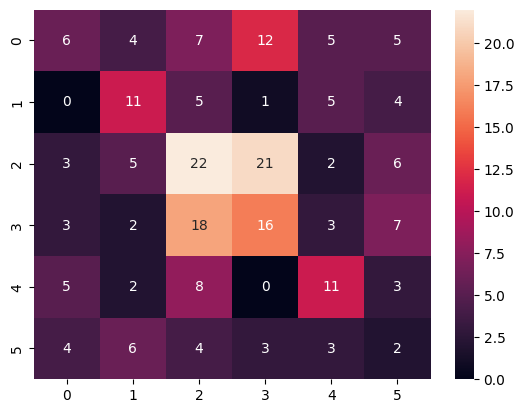

In [14]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

# hyperparameter tunning

In [15]:
d = DecisionTreeClassifier()

In [16]:
para = {"criterion" : ["gini", "entropy", "log_loss"],"splitter" : ["best", "random"]}

In [17]:
g = GridSearchCV(d,para, cv= 2)

In [18]:
g.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']})

In [22]:
y_pred1 = g.predict(x_test)

In [23]:
accuracy_score(y_test,y_pred1)

0.32589285714285715

In [62]:
confusion_matrix(y_test,y_pred1)

array([[ 8,  5,  4, 11,  6,  5],
       [ 1, 12,  4,  5,  3,  1],
       [ 5,  4, 14, 25,  7,  4],
       [ 2,  2, 12, 22,  5,  6],
       [ 5,  4,  1,  5,  9,  5],
       [ 3,  3,  2,  2,  4,  8]], dtype=int64)

In [63]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.33      0.21      0.25        39
           1       0.40      0.46      0.43        26
           2       0.38      0.24      0.29        59
           3       0.31      0.45      0.37        49
           4       0.26      0.31      0.29        29
           5       0.28      0.36      0.31        22

    accuracy                           0.33       224
   macro avg       0.33      0.34      0.32       224
weighted avg       0.33      0.33      0.32       224



<Axes: >

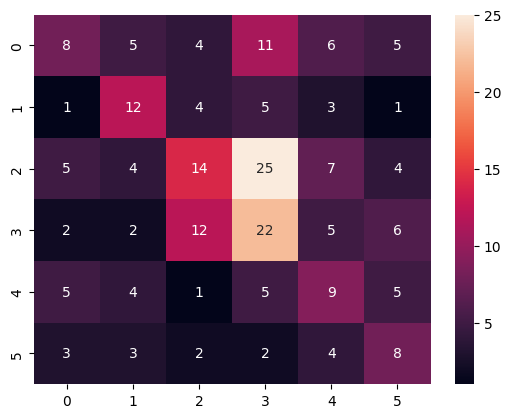

In [64]:
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True)

# adaboost

In [27]:
a = AdaBoostClassifier()

In [28]:
a.fit(x_train,y_train)

C:\Users\UT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [29]:
y_pred2 = a.predict(x_test)

In [30]:
accuracy_score(y_test,y_pred2)

0.3705357142857143

In [31]:
confusion_matrix(y_test,y_pred2)

array([[ 8,  3, 11, 10,  0,  7],
       [ 1,  7,  8,  3,  3,  4],
       [ 3,  5, 12, 26,  6,  7],
       [ 2,  0,  6, 35,  2,  4],
       [ 5,  3,  1,  5, 10,  5],
       [ 3,  0,  4,  4,  0, 11]], dtype=int64)

In [33]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.36      0.21      0.26        39
           1       0.39      0.27      0.32        26
           2       0.29      0.20      0.24        59
           3       0.42      0.71      0.53        49
           4       0.48      0.34      0.40        29
           5       0.29      0.50      0.37        22

    accuracy                           0.37       224
   macro avg       0.37      0.37      0.35       224
weighted avg       0.37      0.37      0.35       224



<Axes: >

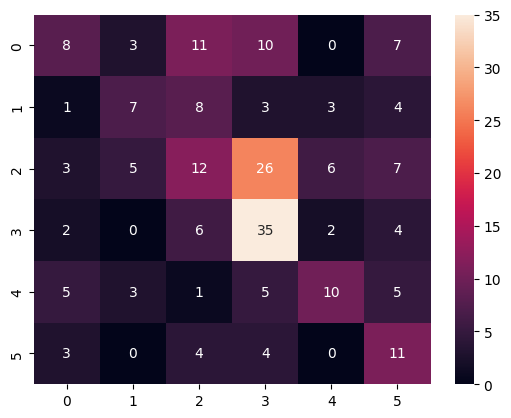

In [34]:
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True)

# Random forest

In [35]:
r = RandomForestClassifier()

In [36]:
r.fit(x_train,y_train)

RandomForestClassifier()

In [38]:
y_pred3 = r.predict(x_test)

In [39]:
accuracy_score(y_test,y_pred3)

0.3794642857142857

In [51]:
confusion_matrix(y_test,y_pred3)

array([[ 7,  5,  5, 11,  2,  9],
       [ 0, 12,  2,  3,  5,  4],
       [ 2,  1, 25, 25,  2,  4],
       [ 1,  1, 12, 33,  2,  0],
       [ 3,  5,  4,  4, 10,  3],
       [ 3,  2,  1,  4,  0, 12]], dtype=int64)

In [52]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.44      0.18      0.25        39
           1       0.46      0.46      0.46        26
           2       0.51      0.42      0.46        59
           3       0.41      0.67      0.51        49
           4       0.48      0.34      0.40        29
           5       0.38      0.55      0.44        22

    accuracy                           0.44       224
   macro avg       0.45      0.44      0.42       224
weighted avg       0.45      0.44      0.43       224



<Axes: >

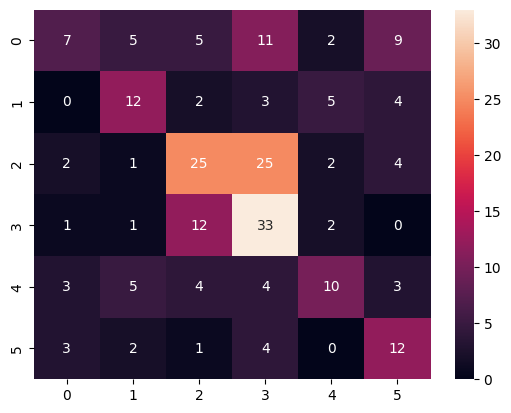

In [61]:
sns.heatmap(confusion_matrix(y_test,y_pred3),annot=True)

# SVC

In [48]:
s = SVC()

In [49]:
s.fit(x_train,y_train)

SVC()

In [53]:
y_pred4 = s.predict(x_test)

In [54]:
accuracy_score(y_test,y_pred4)

0.4419642857142857

In [57]:
confusion_matrix(y_test,y_pred4)

array([[ 7,  5,  5, 11,  2,  9],
       [ 0, 12,  2,  3,  5,  4],
       [ 2,  1, 25, 25,  2,  4],
       [ 1,  1, 12, 33,  2,  0],
       [ 3,  5,  4,  4, 10,  3],
       [ 3,  2,  1,  4,  0, 12]], dtype=int64)

In [58]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.44      0.18      0.25        39
           1       0.46      0.46      0.46        26
           2       0.51      0.42      0.46        59
           3       0.41      0.67      0.51        49
           4       0.48      0.34      0.40        29
           5       0.38      0.55      0.44        22

    accuracy                           0.44       224
   macro avg       0.45      0.44      0.42       224
weighted avg       0.45      0.44      0.43       224



<Axes: >

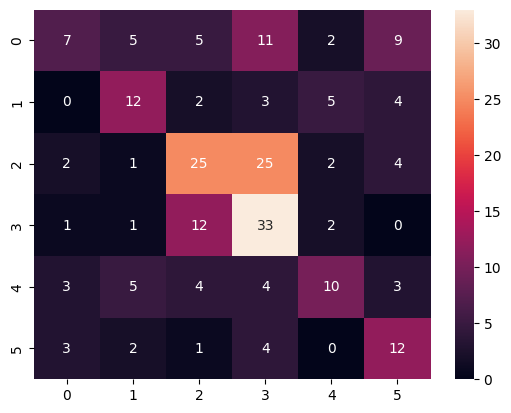

In [60]:
sns.heatmap(confusion_matrix(y_test,y_pred4),annot=True)

# hyperparameter tunning

In [66]:
S = SVC()

In [67]:
param = {"C" : [0.1,1.0,10.0,100.0],"kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],"gamma" : ['scale', 'auto']}

In [70]:
G = GridSearchCV(S,param, cv= 2)

In [71]:
G.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10.0, 100.0],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [72]:
y_pred5 = s.predict(x_test)

In [73]:
accuracy_score(y_test,y_pred5)

0.4419642857142857

In [74]:
confusion_matrix(y_test,y_pred5)

array([[ 7,  5,  5, 11,  2,  9],
       [ 0, 12,  2,  3,  5,  4],
       [ 2,  1, 25, 25,  2,  4],
       [ 1,  1, 12, 33,  2,  0],
       [ 3,  5,  4,  4, 10,  3],
       [ 3,  2,  1,  4,  0, 12]], dtype=int64)

In [75]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.44      0.18      0.25        39
           1       0.46      0.46      0.46        26
           2       0.51      0.42      0.46        59
           3       0.41      0.67      0.51        49
           4       0.48      0.34      0.40        29
           5       0.38      0.55      0.44        22

    accuracy                           0.44       224
   macro avg       0.45      0.44      0.42       224
weighted avg       0.45      0.44      0.43       224



<Axes: >

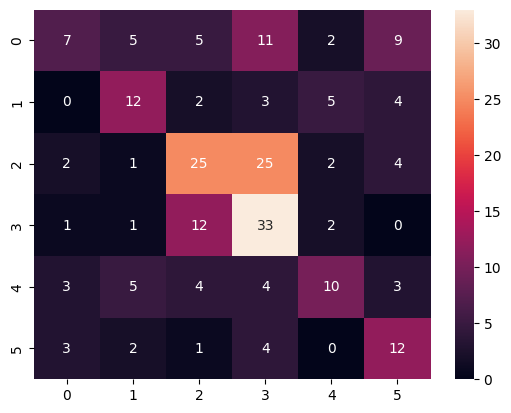

In [76]:
sns.heatmap(confusion_matrix(y_test,y_pred5),annot=True)